In [1]:
import sys
import pandas as pd
import sklearn
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import fbeta_score, make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
data = pd.read_csv('adult_data.csv', na_values='?')

In [3]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,0,1,0,1,0,1,0,1,1,...,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,1
1,0,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,India,no,2.255185,18 and more,Self,1
2,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United States,no,2.276617,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,1


In [4]:
data.replace('?', np.nan, inplace=True)


In [5]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class'],
      dtype='object')

In [6]:
data = data.drop(columns=['contry_of_res', 'used_app_before','age_desc', 'relation'])

In [7]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,Class
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,NaN,no,no,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,NaN,no,no,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,NaN,no,no,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,NaN,no,no,-4.777286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,1,0,1,1,0,1,1,1,1,25.000000,f,White-European,no,no,7.000000,1
1495,1,0,0,0,0,0,0,1,0,1,34.000000,m,Hispanic,no,no,3.000000,0
1496,1,0,1,1,1,0,1,1,0,1,24.000000,f,NaN,no,no,7.000000,1
1497,1,0,0,1,1,0,1,0,1,1,35.000000,m,'South Asian',no,no,6.000000,0


In [8]:
data.dtypes

A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
gender        object
ethnicity     object
jaundice      object
austim        object
result       float64
Class          int64
dtype: object

In [9]:
categorical = ['gender','ethnicity','jaundice','austim']
label = LabelEncoder()


In [10]:
for i in categorical:
    data[i] = label.fit_transform(data[i])

In [12]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,Class
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,13,0,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,13,0,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,11,0,1,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,13,0,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,13,0,0,-4.777286,1


In [13]:
data['Class'] = label.fit_transform(data['Class'])

In [14]:
X = data.drop(columns=['Class'])
Y = data['Class']

In [15]:
from sklearn import model_selection
# split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [16]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
X_imputed = imputer.fit_transform(X)

In [17]:
X_imputed.shape

(1499, 16)

In [18]:
Y.shape

(1499,)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=1),
    "SVM": SVC(kernel='linear', C=1.0, gamma=2),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(random_state=0)
}

# Define a custom scoring function for fbeta_score
scoring = make_scorer(fbeta_score, beta=0.5)

# Create an empty list to store pipelines
pipelines = []

# Iterate through each classifier
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    

Evaluating Decision Tree
Cross-validated Fbeta Score: 0.9596574811414362
Cross-validated ROC AUC Score: 0.9397481136976935
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===
Evaluating Random Forest
Cross-validated Fbeta Score: 0.9542474779417212
Cross-validated ROC AUC Score: 0.9772797483406727
Fbeta Score on Test Set: 0.9989806320081551
[[103   0]
 [  1 196]]
===
Evaluating SVM
Cross-validated Fbeta Score: 0.8784929427713621
Cross-validated ROC AUC Score: 0.8673626171525332
Fbeta Score on Test Set: 0.8719052744886976
[[ 82  21]
 [ 35 162]]
===
Evaluating KNN
Cross-validated Fbeta Score: 0.9301233406954479
Cross-validated ROC AUC Score: 0.946236145973541
Fbeta Score on Test Set: 0.9621621621621621
[[ 99   4]
 [ 19 178]]
===
Evaluating Logistic Regression
Cross-validated Fbeta Score: 0.8592984661640474
Cross-validated ROC AUC Score: 0.8741362045983895
Fbeta Score on Test Set: 0.8543983822042466
[[ 74  29]
 [ 28 169]]
===
Evaluating Linear Discriminant Analysis
Cross-validated Fbet

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

Cross-validated Fbeta Score: 0.9983551110770753
Cross-validated ROC AUC Score: 0.9991499902214187
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===
Evaluating AdaBoost
Cross-validated Fbeta Score: 0.9989694546829252
Cross-validated ROC AUC Score: 0.9980801061683415
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===


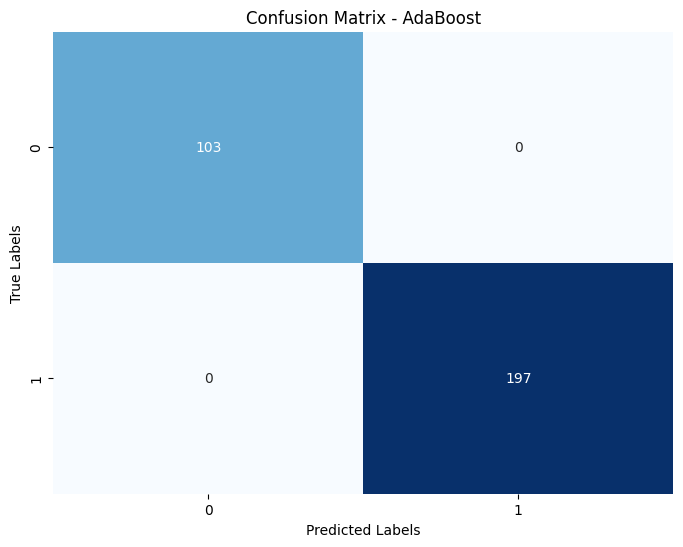

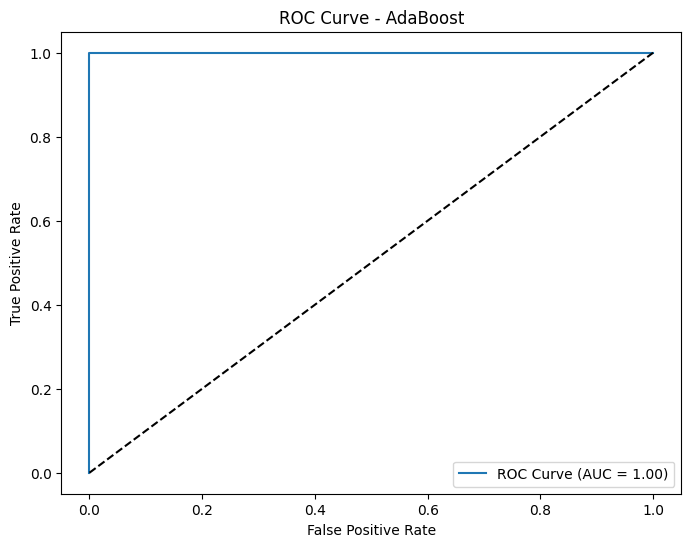

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Get decision function scores
decision_scores = pipeline.decision_function(X_test_imputed)

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {name}')
plt.legend(loc='lower right')
plt.show()

Evaluating Decision Tree
Cross-validated Fbeta Score: 0.9596574811414362
Cross-validated ROC AUC Score: 0.9397481136976935
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===


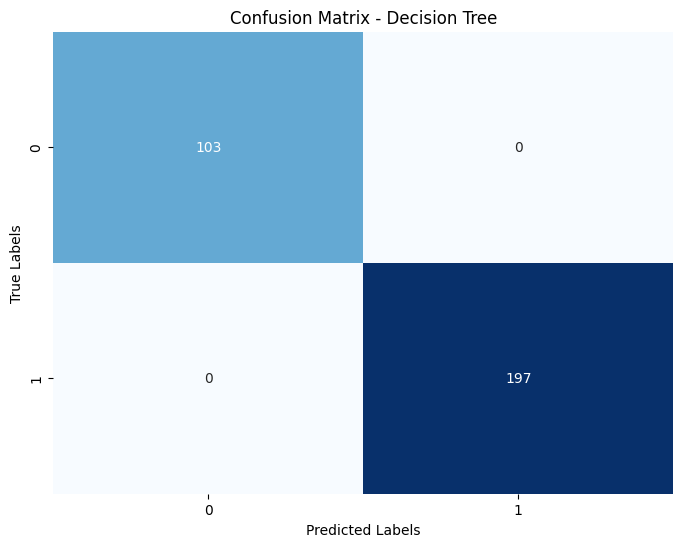

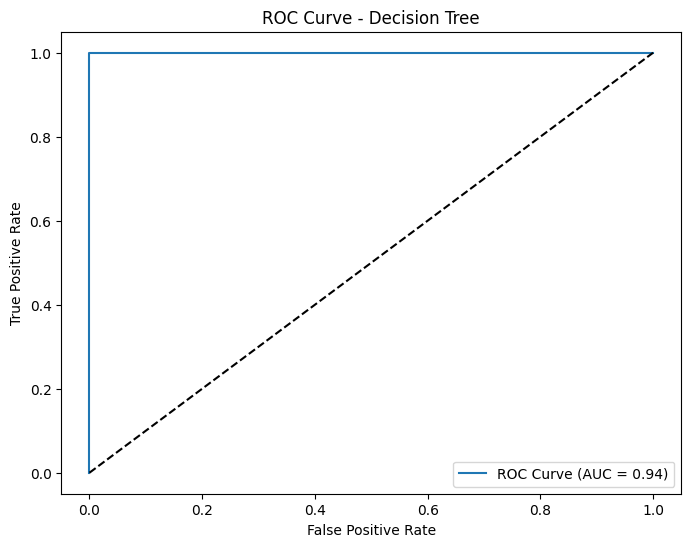

Evaluating Random Forest
Cross-validated Fbeta Score: 0.9542474779417212
Cross-validated ROC AUC Score: 0.9772797483406727
Fbeta Score on Test Set: 0.9989806320081551
[[103   0]
 [  1 196]]
===


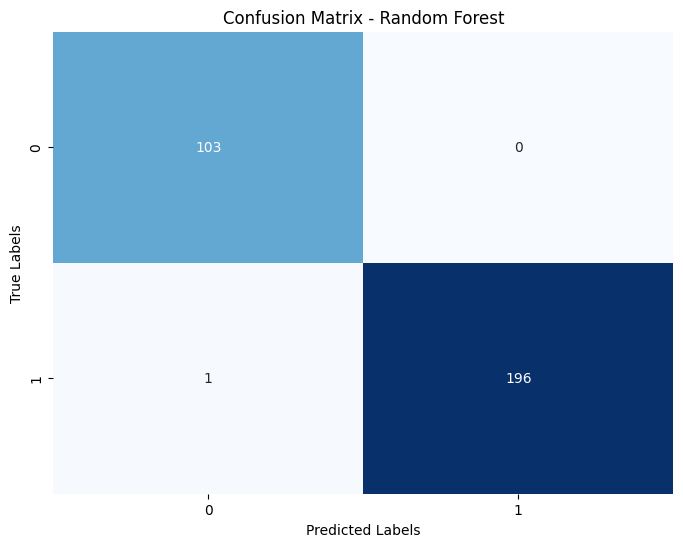

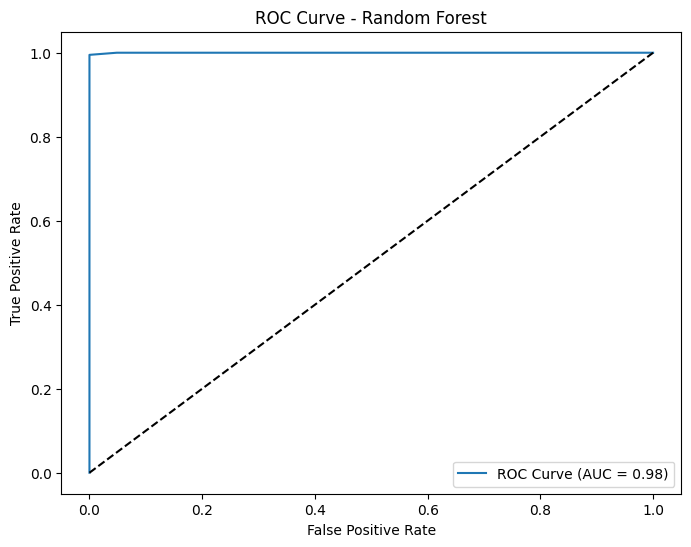

Evaluating SVM
Cross-validated Fbeta Score: 0.8784929427713621
Cross-validated ROC AUC Score: 0.8673626171525332
Fbeta Score on Test Set: 0.8719052744886976
[[ 82  21]
 [ 35 162]]
===


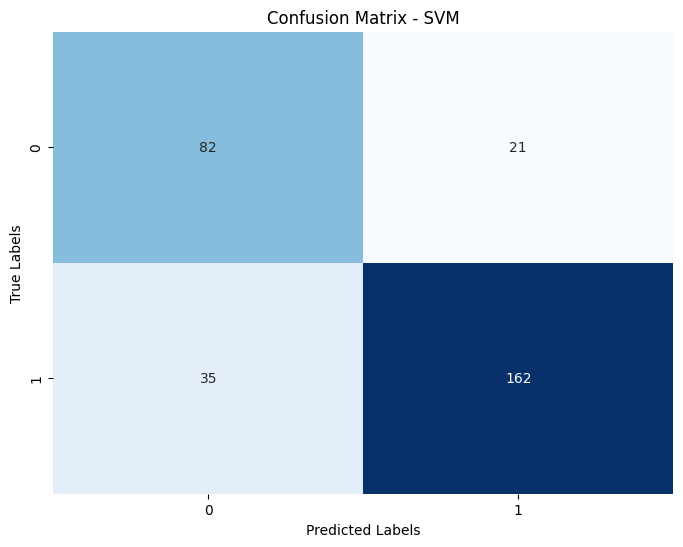

SVM classifier does not support probability estimation, skipping ROC curve plot.


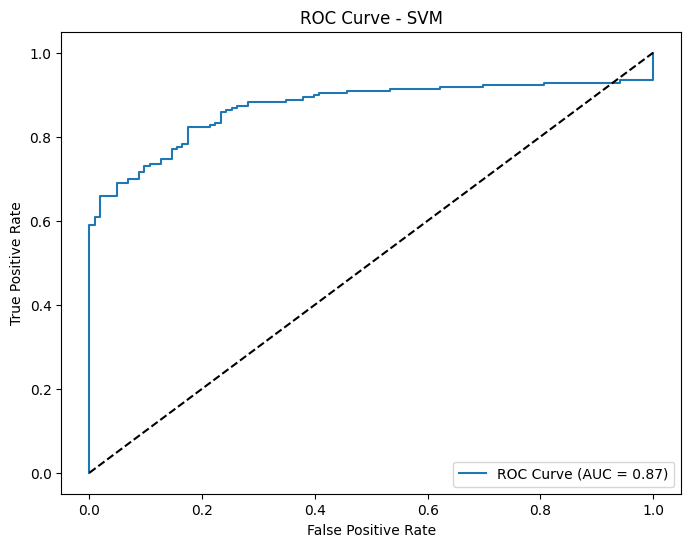

Evaluating KNN
Cross-validated Fbeta Score: 0.9301233406954479
Cross-validated ROC AUC Score: 0.946236145973541
Fbeta Score on Test Set: 0.9621621621621621
[[ 99   4]
 [ 19 178]]
===


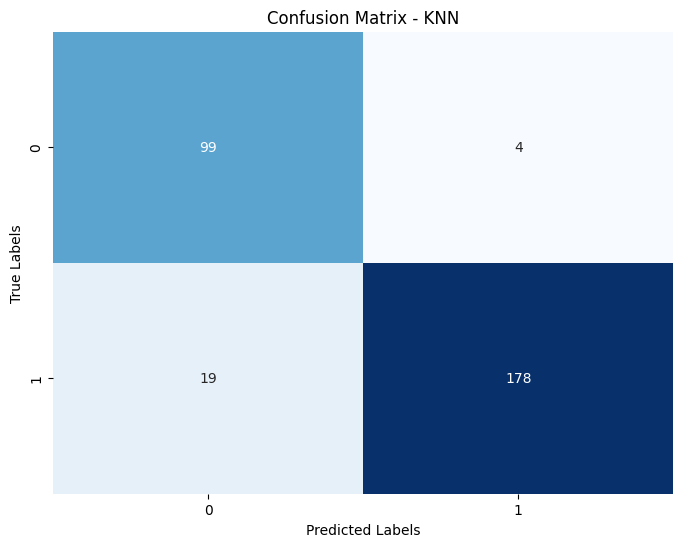

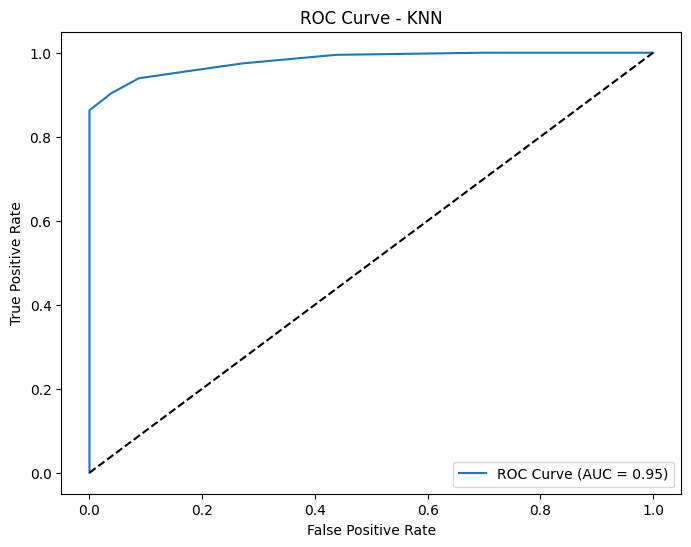

Evaluating Logistic Regression
Cross-validated Fbeta Score: 0.8592984661640474
Cross-validated ROC AUC Score: 0.8741362045983895
Fbeta Score on Test Set: 0.8543983822042466
[[ 74  29]
 [ 28 169]]
===


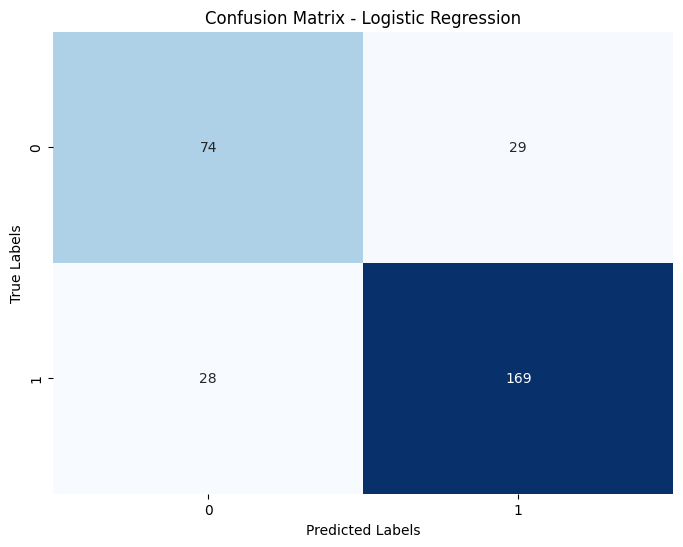

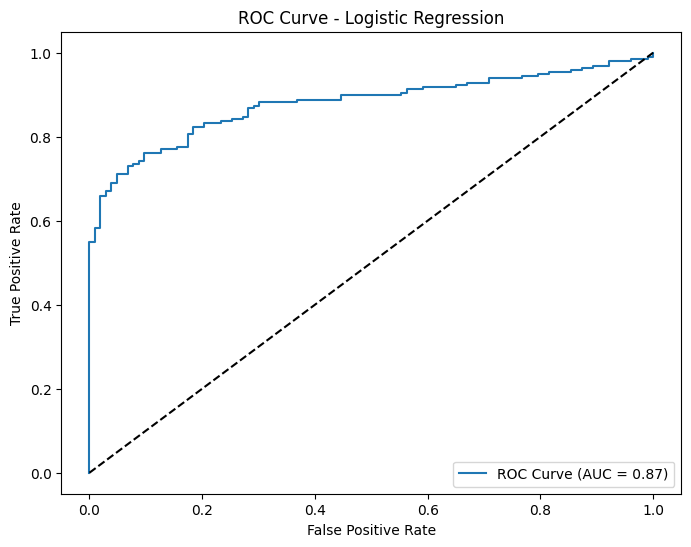

Evaluating Linear Discriminant Analysis
Cross-validated Fbeta Score: 0.8637905770010976
Cross-validated ROC AUC Score: 0.8752007057679327
Fbeta Score on Test Set: 0.8613659531090724
[[ 76  27]
 [ 28 169]]
===


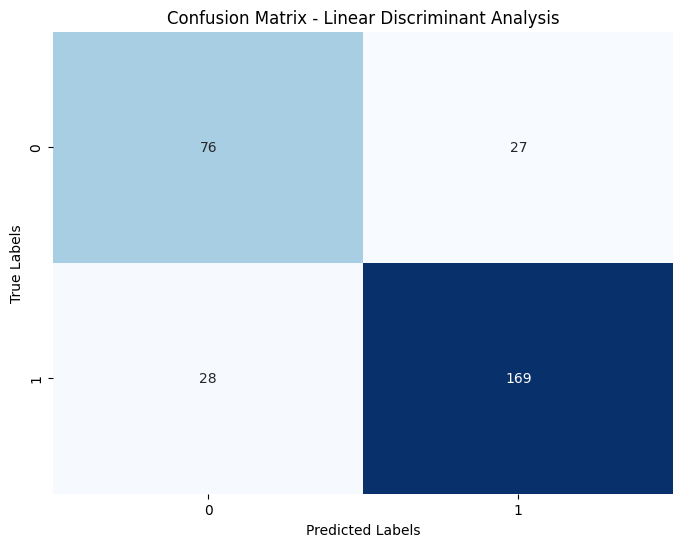

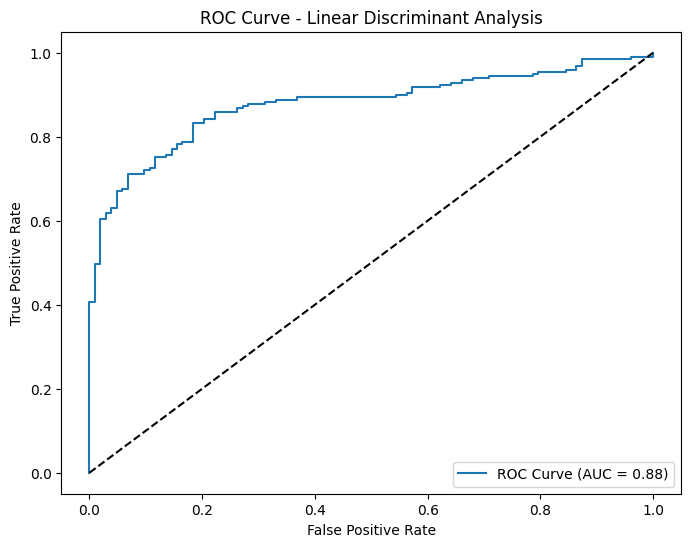

Evaluating Quadratic Discriminant Analysis
Cross-validated Fbeta Score: 0.8863224714761998
Cross-validated ROC AUC Score: 0.9782505309816234
Fbeta Score on Test Set: 0.9540636042402828
[[102   1]
 [ 35 162]]
===


c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  war

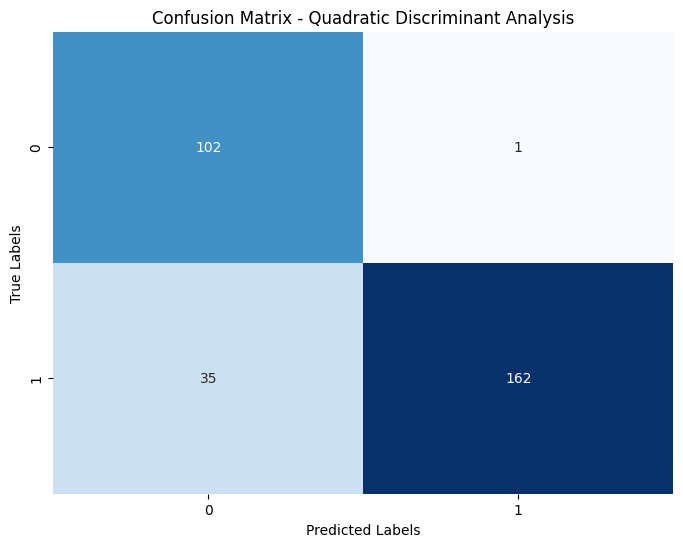

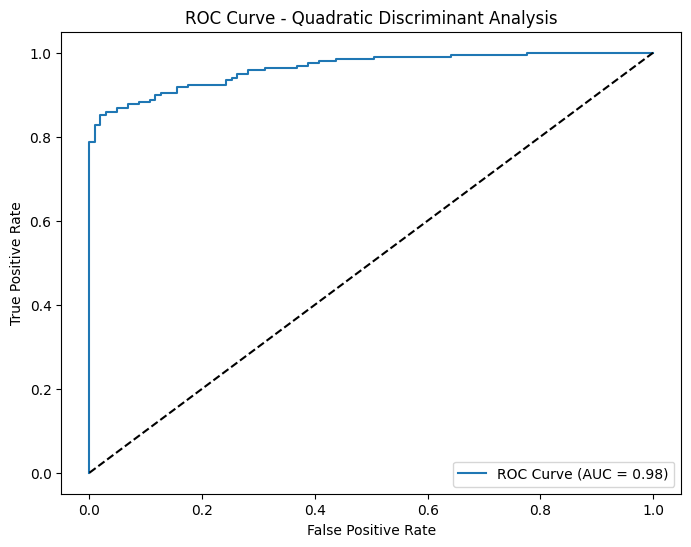

Evaluating Gradient Boosting
Cross-validated Fbeta Score: 0.9983551110770753
Cross-validated ROC AUC Score: 0.9991499902214187
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===


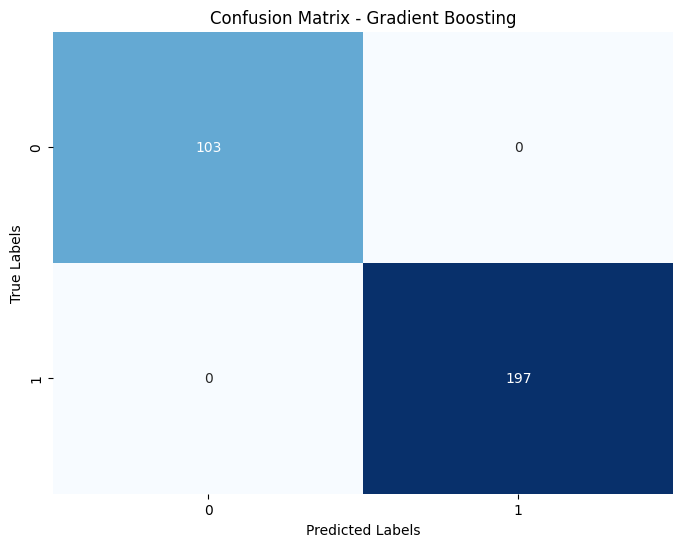

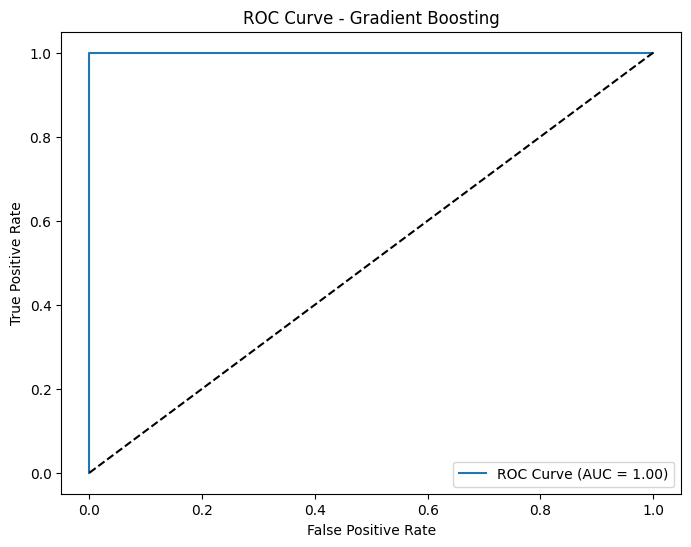

Evaluating AdaBoost
Cross-validated Fbeta Score: 0.9989694546829252
Cross-validated ROC AUC Score: 0.9980801061683415
Fbeta Score on Test Set: 1.0
[[103   0]
 [  0 197]]
===


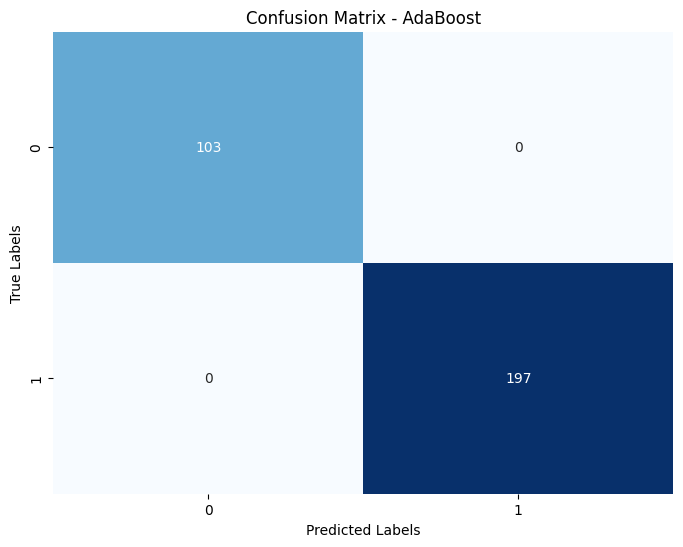

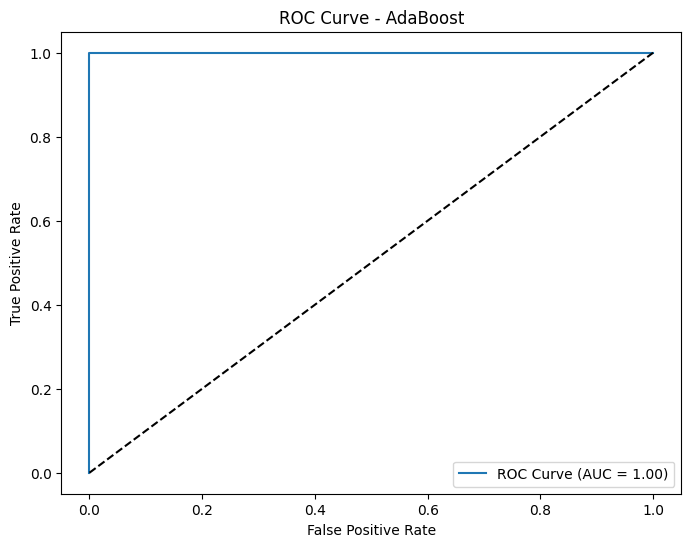

In [22]:
for name, classifier in classifiers.items():
    print(f"Evaluating {name}")
    
    # Cross-validation with fbeta_score
    cv_scores_fbeta = cross_val_score(classifier, X_imputed, Y, cv=10, scoring=scoring)
    print(f"Cross-validated Fbeta Score: {np.mean(cv_scores_fbeta)}")
    
    # Cross-validation with ROC AUC score
    cv_scores_roc_auc = cross_val_score(classifier, X_imputed, Y, cv=10, scoring='roc_auc')
    print(f"Cross-validated ROC AUC Score: {np.mean(cv_scores_roc_auc)}")
    
    # Create a pipeline with the classifier and fit it
    classifier_clone = clone(classifier)
    pipeline = Pipeline([
        ('classifier', classifier_clone)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))
    
    # Make predictions on the test data using the pipeline
    predictions_test = pipeline.predict(X_test_imputed)
    
    # Evaluate the predictions using fbeta_score
    fbeta = fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)
    
    print(f"Fbeta Score on Test Set: {fbeta}")
    
    confusion = metrics.confusion_matrix(Y_test, predictions_test)
    print(confusion)
    print("===")
    
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Plot ROC curve if classifier supports probability estimation
    if hasattr(classifier, 'predict_proba'):
        fpr, tpr, _ = metrics.roc_curve(Y_test, pipeline.predict_proba(X_test_imputed)[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"{name} classifier does not support probability estimation, skipping ROC curve plot.")
        # Get decision function scores
        decision_scores = pipeline.decision_function(X_test_imputed)

        # Calculate ROC curve
        fpr, tpr, _ = metrics.roc_curve(Y_test, decision_scores)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {np.mean(cv_scores_roc_auc):.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()


In [23]:
import joblib

# Save the trained model
model_filename = 'autism__adult_model.joblib'
joblib.dump(classifiers, model_filename)

['autism__adult_model.joblib']

In [24]:
pipelines = []

# Iterate through each classifier and create a pipeline
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('imputer', imputer),
        ('classifier', classifier)
    ])
    pipeline.fit(X_imputed, Y)
    pipelines.append((name, pipeline))

c:\Users\danus\miniconda3\envs\myenv\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [25]:
joblib.dump(pipelines, 'autism__adult_detection_pipelines.pkl')

['autism__adult_detection_pipelines.pkl']

In [26]:
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_imputed, Y)

GradientBoostingClassifier(random_state=0)

In [28]:
y_pred = gb_model.predict(X_test_imputed)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [29]:
fbeta = fbeta_score(Y_test, y_pred, average='binary', beta=0.5)

In [30]:
fbeta

1.0

In [31]:
gb_file = "gb_model.pkl"
joblib.dump(gb_model, gb_file)

['gb_model.pkl']